<a href="https://colab.research.google.com/github/jmolinaribba/Datasets/blob/main/ProyectoParteIII%2BMolina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Dataset:** Global Data on Sustainable Energy

El análisis de la sostenibilidad energética es crucial para comprender cómo los países están enfrentando los desafíos ambientales y sociales del siglo XXI. Este estudio utiliza un conjunto de datos globales que abarca un período de 20 años (2000-2020) para analizar tendencias relacionadas con el uso de energía sostenible en diversos países del mundo, con un enfoque particular en Sudamérica y, especialmente, en Argentina.

El dataset incluye variables clave como el acceso a la electricidad de la población, las emisiones de CO₂ de cada país, el consumo de energía per cápita, las fuentes de energía utilizadas (fósil, nuclear y renovables), el crecimiento del Producto Bruto Interno (PBI), el porcentaje de utilización de energías renovables con respecto al total, la latitud y longitud de cada país, entre otros indicadores. Estas métricas permiten evaluar la evolución de la sostenibilidad energética en la región y cómo esta se relaciona con el desarrollo económico y social.

El principal objetivo del análisis es observar cómo ha cambiado el panorama energético en Argentina y compararlo con otros países sudamericanos. Entre las preguntas que se busca responder están: ¿Qué país utiliza un mayor porcentaje de energías renovables en la región? ¿Existe en Argentina una relación lineal entre el acceso a la electricidad por parte de la población y la emisión de CO₂? ¿Qué país sudamericano tiene un mayor consumo de electricidad per capita?

A través de la utilización de las herramientas aprendidas hasta el momento, este estudio busca responder estas preguntas y aportar una clara visualización de los datos que nos ayude a orientarnos.

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [36]:
url="https://raw.githubusercontent.com/jmolinaribba/Datasets/refs/heads/main/global-data-on-sustainable-energy%20.csv"
df=pd.read_csv(url)

In [60]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3628 non-null   float64
 7   Electricity from fossil fuels (TW

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


Para empezar el análisis, voy a ver cuántos datos ausentes tiene el dataset.


In [38]:
missing_per_column = df.isna().sum()
total_missing = missing_per_column.sum()
print(f"Total de valores faltantes: {total_missing}")
print(missing_per_column)

Total de valores faltantes: 6978
Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emission

A medida que utilice las columnas para distintas hipótesis iré decidiendo si es necesario tratar con los datos ausentes o si el dataset original tiene todos los datos necesarios para mis hipótesis.

#Primera Hipótesis

**1)** La primera duda que tengo es ¿Que país de la región tiene un mayor uso de energías renovables con respecto al total de la energía consumida? Personalmente tiendo a suponer que los países (en principio) más desarrollados de la región tienen mayor accesos a energías renovables al contar con una infraestructura más preparada y diversa. Para obtener una respuesta, decidí tomar un año al azar dentro de los datos disponibles (en este caso el 2015). Notese que dentro del dataset no hay datos de Bolivia ni de Venezuela.

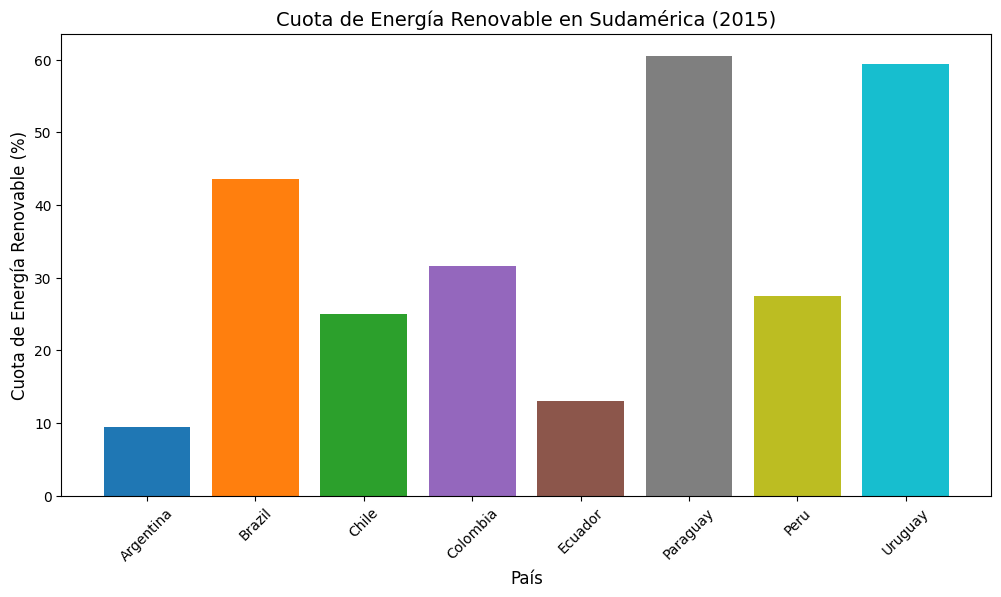

In [48]:
df_2015 = df[df["Year"] == 2015]
df_sudamerica = df_2015[df_2015["Entity"].isin([
    "Argentina", "Brazil", "Chile", "Colombia", "Ecuador", "Peru",
    "Uruguay", "Venezuela", "Bolivia", "Paraguay"
])]
countries = df_sudamerica["Entity"]
renewable_share = df_sudamerica["Renewable energy share in the total final energy consumption (%)"]
colors = plt.cm.tab10(np.linspace(0, 1, len(countries)))
plt.figure(figsize=(12, 6))
bars = plt.bar(countries, renewable_share, color=colors)
plt.xlabel("País", fontsize=12)
plt.ylabel("Cuota de Energía Renovable (%)", fontsize=12)
plt.title("Cuota de Energía Renovable en Sudamérica (2015)", fontsize=14)
plt.xticks(rotation=45)
plt.show()

Así podemos ver que Argentina es el país que menos utiliza las energías renovables en comparación con sus países vecinos, con menos de un 10% del total de la energía utilizada viniendo de fuentes renovables. Esto contradice mi hipótesis ya que un país como Paraguay que es, a priori, menos desarrollado que Argentina posee una cuota de energía renovable muy superior a la nuestra.

# Segunda Hipótesis

**2)** En segundo lugar, me interesaría saber si en nuestro país existe una relación lineal entre el acceso que tiene la población a la electricidad y la emisión de CO₂. Tiendo a creer que esto es cierto ya que para la generación de energía eléctrica se utilizan combustibles que liberan una gran cantidad de CO₂.


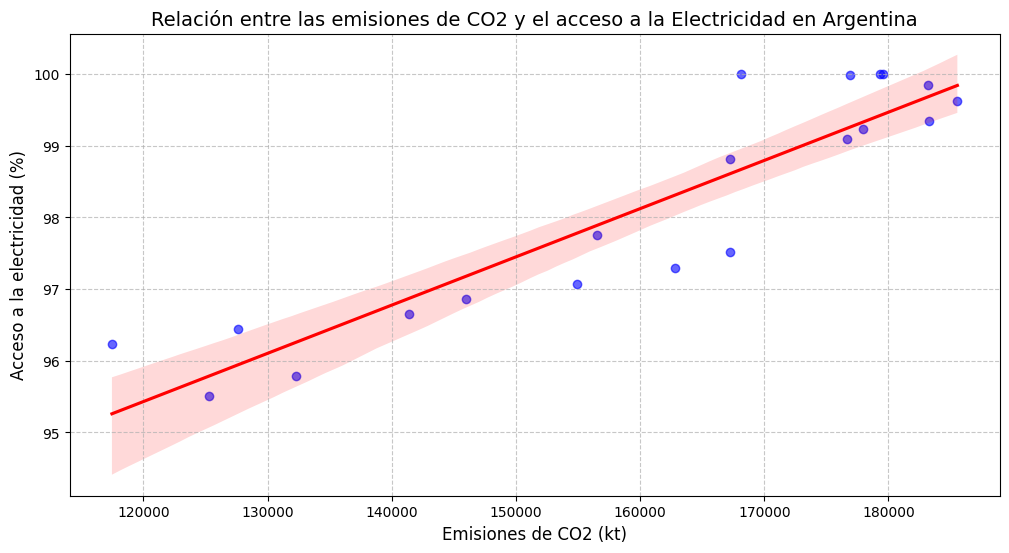

In [43]:
df_argentina = df[df["Entity"] == "Argentina"]
plt.figure(figsize=(12, 6))
sns.regplot(
    data=df_argentina,
    x="Value_co2_emissions_kt_by_country",
    y="Access to electricity (% of population)",
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'},
    color='blue'  )
plt.xlabel("Emisiones de CO2 (kt)", fontsize=12)
plt.ylabel("Acceso a la electricidad (%)", fontsize=12)
plt.title("Relación entre las emisiones de CO2 y el acceso a la Electricidad en Argentina", fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.show()

Se observa que hay una considerable relación lineal entre el acceso a la electricidad y las emisones de CO2. A mayor acceso a la electricidad por parte de la población, mayor emisión de CO2 del país, confirmando así la hipótesis planteada.

#Tercera Hipótesis

**3)** Por último quería saber ¿Qué país sudamericano tiene un mayor consumo de electricidad per capita?
Como hipótesis vamos a suponer que aquellos países que presentan a la mayoría de su población urbanizada tienen un consumo de electricidad per cápita mayor. Aquellos países que cuenten con una mayor cantidad de la población en zonas rurales serán los que consuman menos electricidad per cápita.

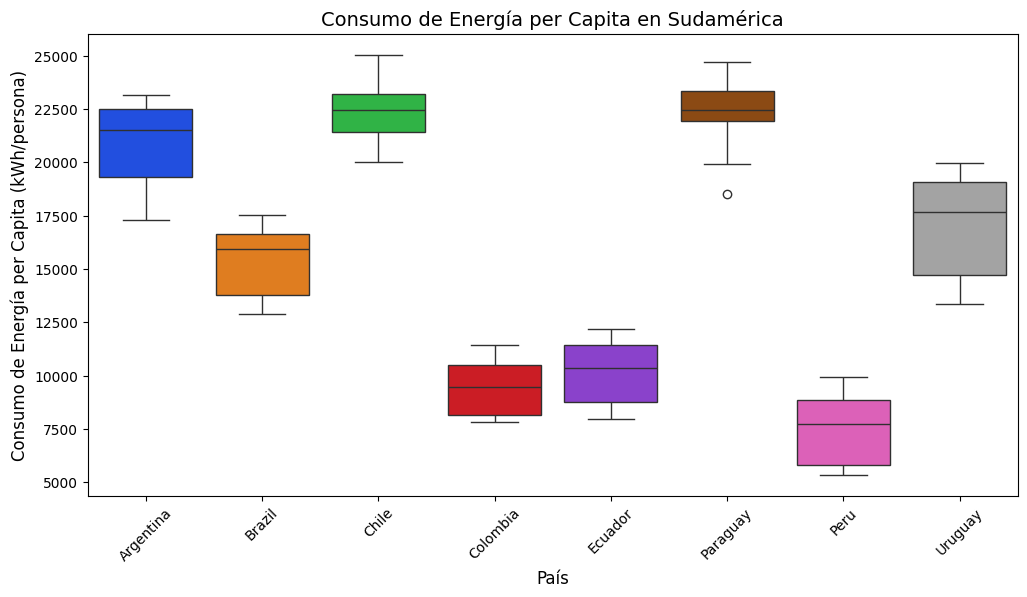

In [50]:
df_sudamerica_total = df[df["Entity"].isin([
    "Argentina", "Brazil", "Chile", "Colombia", "Ecuador", "Peru",
    "Uruguay", "Venezuela", "Bolivia", "Paraguay"
])]
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_sudamerica_total,
    x="Entity",
    y="Primary energy consumption per capita (kWh/person)",
    hue = "Entity", palette="bright"
)
plt.xlabel("País", fontsize=12)
plt.ylabel("Consumo de Energía per Capita (kWh/persona)", fontsize=12)
plt.title("Consumo de Energía per Capita en Sudamérica", fontsize=14)
plt.xticks(rotation=45)
plt.show()

Aquí observamos que Chile y Paraguay son los países con mayor consumo promedio per capita, siendo Perú el país que menos energía consume por persona. Además vemos una distribución normal de consumo en todos los países con un único outlier en el caso de Paraguay que no considero necesario eliminar, ya que no altera mis conclusiones. Perú reafirma la teoría de que aquellos países menos urbanizados consumen menos electricidad per cápita, pero Paraguay contradice la misma hipótesis al ser un país con mucha población rural e indígena y aún así poseer un alto consumo eléctrico por cabeza. Por lo tanto la hipótesis no puede ser concluyente.


---



A lo largo del trabajo no he necesitado trabajar con datos ausentes, ya que mis hipótesis han podido ser probadas o refutadas con los datos provistos por el dataset.

# Modelos de Aprendizaje Supervisado y No supervisado

 Por último, y en base a las unidades finales del curso, considero que se podría trabajar con un modelo de aprendizaje supervisado para predecir valores numéricos, como podría ser un modelo de regresión para predecir la emisión de CO2 de un país o un modelo de clasificación para agrupar países según su acceso a energía nuclear.

Además podríamos aplicar modelos de aprendizaje no supervisado como el clustering para agrupar países por continente, por ejemplo, y así comparar el desempeño de cada región. También podríamos hacer un análisis PCA para ver si el dataset contiene variables correlacionadas que nos permitan reducir la simensionalidad sin perder información valiosa.